In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn import svm
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


<Axes: title={'center': 'Distribution of Labels'}, xlabel='label'>

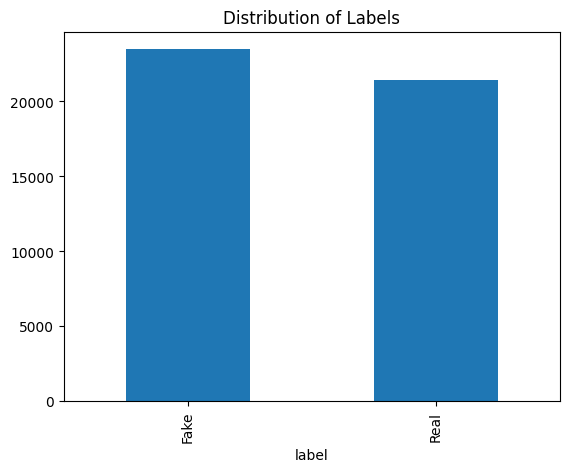

In [2]:
df = pd.read_csv("data/news.csv")
df.dropna(inplace=True)
df['label'] = df['label'].str.capitalize()
df.head()
df['label'].value_counts().plot(kind='bar', title='Distribution of Labels')


In [3]:
# Feature and label selection
X_text = df['text']
y = df['label']

# Vectorize text
tfidf = TfidfVectorizer(stop_words='english', max_df=0.95)
X = tfidf.fit_transform(X_text)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [4]:
# Passive Aggressive
pac = PassiveAggressiveClassifier(max_iter=1000)
pac.fit(X_train, y_train)

# SVM
svm_model = svm.LinearSVC()
svm_model.fit(X_train, y_train)


,penalty,'l2'
,loss,'squared_hinge'
,dual,'auto'
,tol,0.0001
,C,1.0
,multi_class,'ovr'
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,verbose,0
,random_state,None


📊 Passive Aggressive Accuracy: 0.9947
Passive Aggressive F1 Score: 0.9949


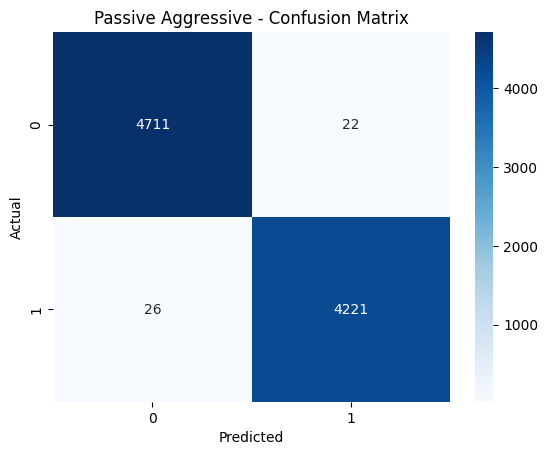

📊 SVM Accuracy: 0.9942
SVM F1 Score: 0.9945


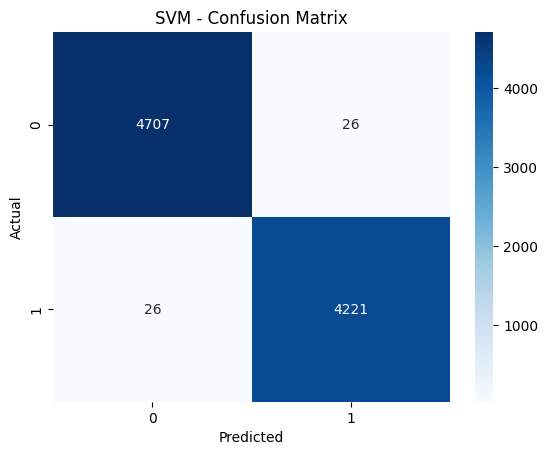

In [5]:
def evaluate(model, name):
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, pos_label='Fake')
    cm = confusion_matrix(y_test, y_pred)

    print(f"📊 {name} Accuracy: {acc:.4f}")
    print(f"{name} F1 Score: {f1:.4f}")
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f"{name} - Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

# Evaluate both models
evaluate(pac, "Passive Aggressive")
evaluate(svm_model, "SVM")


In [6]:
sample_news = ["Breaking: Government confirms new lockdown from tomorrow."]
sample_vec = tfidf.transform(sample_news)
pred = pac.predict(sample_vec)
print("Prediction:", pred[0])


Prediction: Fake


In [7]:
import joblib

joblib.dump(pac, "model/pac_model.pkl")
joblib.dump(tfidf, "model/tfidf_vectorizer.pkl")


['model/tfidf_vectorizer.pkl']